In [44]:
# CLEANING WITH KEEPING THE NULL LOCATIONS

import pandas as pd
from pathlib import Path

# Define base folder
base_path = Path("..") / "Full Data"  # Adjust for own storage logic

# List to store individual DataFrames
dfs = []

# Folders where cleaned files will be saved
output_path = Path("cleaned_monthly_data")
output_path.mkdir(exist_ok=True)

output_path_burglary = Path("cleaned_monthly_burglary_data")
output_path_burglary.mkdir(exist_ok=True)

# Loop through each subfolder
for month_folder in base_path.iterdir():
    if month_folder.is_dir():
        monthly_dfs = [] # Collect data from both police forces

        for csv_file in month_folder.glob("*street*.csv"):
            if "city-of-london-street" in csv_file.name or "metropolitan-street" in csv_file.name:
                try:
                    # Load CSV
                    df = pd.read_csv(csv_file)

                    # Drop 'Context' column if it exists and is entirely empty
                    if "Context" in df.columns and df["Context"].isna().all():
                        df = df.drop(columns=["Context"])

                    # Drop duplicates
                    df = df.drop_duplicates()

                    # Remove out of boundary data
                    boundary_mask = ((df["Latitude"] <= 51.69) &
                          (df["Latitude"] >= 51.28) &
                          (df["Longitude"] <= 0.33) &
                          (df["Longitude"] >= -0.51))
                    
                    # Combine boundary_mask with keeping null data
                    df = df[boundary_mask | df["Latitude"].isna() | df["Longitude"].isna()]

                    monthly_dfs.append(df)

                except Exception as e:
                    print(f"Failed to process {csv_file}: {e}")

        # Create output filename
        
        
        if monthly_dfs:
            df = pd.concat(monthly_dfs, ignore_index=True)
            month_str = month_folder.name
            # Save cleaned CSV
            out_file_all = output_path / f"{month_str}_cleaned.csv"
            df.to_csv(out_file_all, index=False)
            print(f"Saved cleaned file for {month_str} to {out_file_all}")

            # Create burglary only database
            burglary_df = df[df["Crime type"] == "Burglary"]

            # Save (cleaned) only burglary CSV
            out_file_burglary = output_path_burglary / f"{month_str}_burglary_cleaned.csv"
            burglary_df.to_csv(out_file_burglary, index=False)
            print(f"Saved burglary-only file for {month_str} to {out_file_burglary}")

            dfs.append(df)

# Combine all into a single DataFrame
bigger_df = pd.concat(dfs, ignore_index=True)


Saved cleaned file for 2010-12 to cleaned_monthly_data\2010-12_cleaned.csv
Saved burglary-only file for 2010-12 to cleaned_monthly_burglary_data\2010-12_burglary_cleaned.csv
Saved cleaned file for 2011-01 to cleaned_monthly_data\2011-01_cleaned.csv
Saved burglary-only file for 2011-01 to cleaned_monthly_burglary_data\2011-01_burglary_cleaned.csv
Saved cleaned file for 2011-02 to cleaned_monthly_data\2011-02_cleaned.csv
Saved burglary-only file for 2011-02 to cleaned_monthly_burglary_data\2011-02_burglary_cleaned.csv
Saved cleaned file for 2011-03 to cleaned_monthly_data\2011-03_cleaned.csv
Saved burglary-only file for 2011-03 to cleaned_monthly_burglary_data\2011-03_burglary_cleaned.csv
Saved cleaned file for 2011-04 to cleaned_monthly_data\2011-04_cleaned.csv
Saved burglary-only file for 2011-04 to cleaned_monthly_burglary_data\2011-04_burglary_cleaned.csv
Saved cleaned file for 2011-05 to cleaned_monthly_data\2011-05_cleaned.csv
Saved burglary-only file for 2011-05 to cleaned_monthly

In [47]:
# CLEANING WITH NULL LOCATIONS REMOVED

import pandas as pd
from pathlib import Path

# Define base folder
base_path = Path("..") / "Full Data"  # Adjust for own storage logic

# List to store individual DataFrames
dfs = []

# Folders where cleaned files will be saved
output_path = Path("cleaned_spatial_monthly_data")
output_path.mkdir(exist_ok=True)

output_path_burglary = Path("cleaned_spatial_monthly_burglary_data")
output_path_burglary.mkdir(exist_ok=True)

# Loop through each subfolder
for month_folder in base_path.iterdir():
    if month_folder.is_dir():
        monthly_dfs = [] # Collect data from both police forces

        for csv_file in month_folder.glob("*street*.csv"):
            if "city-of-london-street" in csv_file.name or "metropolitan-street" in csv_file.name:
                try:
                    # Load CSV
                    df = pd.read_csv(csv_file)

                    # Drop 'Context' column if it exists and is entirely empty
                    if "Context" in df.columns and df["Context"].isna().all():
                        df = df.drop(columns=["Context"])

                    # Drop duplicates
                    df = df.drop_duplicates()

                    # Remove out of boundary (and null) data
                    df = df[(df["Latitude"] <= 51.69) &
                          (df["Latitude"] >= 51.28) &
                          (df["Longitude"] <= 0.33) &
                          (df["Longitude"] >= -0.51)]

                    monthly_dfs.append(df)

                except Exception as e:
                    print(f"Failed to process {csv_file}: {e}")

        # Create output filename
        
        
        if monthly_dfs:
            df = pd.concat(monthly_dfs, ignore_index=True)
            month_str = month_folder.name
            # Save cleaned CSV
            out_file_all = output_path / f"{month_str}_cleaned_spatial.csv"
            df.to_csv(out_file_all, index=False)
            print(f"Saved cleaned file for {month_str} to {out_file_all}")

            # Create burglary only database
            burglary_df = df[df["Crime type"] == "Burglary"]

            # Save (cleaned) only burglary CSV
            out_file_burglary = output_path_burglary / f"{month_str}_burglary_cleaned_spatial.csv"
            burglary_df.to_csv(out_file_burglary, index=False)
            print(f"Saved burglary-only file for {month_str} to {out_file_burglary}")

            dfs.append(df)

# Combine all into a single DataFrame
spatial_df = pd.concat(dfs, ignore_index=True)


Saved cleaned file for 2010-12 to cleaned_spatial_monthly_data\2010-12_cleaned_spatial.csv
Saved burglary-only file for 2010-12 to cleaned_spatial_monthly_burglary_data\2010-12_burglary_cleaned_spatial.csv
Saved cleaned file for 2011-01 to cleaned_spatial_monthly_data\2011-01_cleaned_spatial.csv
Saved burglary-only file for 2011-01 to cleaned_spatial_monthly_burglary_data\2011-01_burglary_cleaned_spatial.csv
Saved cleaned file for 2011-02 to cleaned_spatial_monthly_data\2011-02_cleaned_spatial.csv
Saved burglary-only file for 2011-02 to cleaned_spatial_monthly_burglary_data\2011-02_burglary_cleaned_spatial.csv
Saved cleaned file for 2011-03 to cleaned_spatial_monthly_data\2011-03_cleaned_spatial.csv
Saved burglary-only file for 2011-03 to cleaned_spatial_monthly_burglary_data\2011-03_burglary_cleaned_spatial.csv
Saved cleaned file for 2011-04 to cleaned_spatial_monthly_data\2011-04_cleaned_spatial.csv
Saved burglary-only file for 2011-04 to cleaned_spatial_monthly_burglary_data\2011-04

In [ ]:
# Size of the bigger dataset, also split up into the two different police forces

city_df = bigger_df[bigger_df["Reported by"] == "City of London Police"]
print(len(city_df))

metro_df = bigger_df[bigger_df["Reported by"] == "Metropolitan Police Service"]
print(len(metro_df))

print(len(bigger_df))

97990
12656379
13031846


In [ ]:
# Size of the spatial dataset, also split up into the two different police forces

city_df = spatial_df[spatial_df["Reported by"] == "City of London Police"]
print(len(city_df))

metro_df = spatial_df[spatial_df["Reported by"] == "Metropolitan Police Service"]
print(len(metro_df))

print(len(spatial_df))

92013
12498096
12867586


In [ ]:
# Null data check for bigger dataset

# Count nulls per column
null_counts = bigger_df.isnull().sum()

# Show columns with at least one null
print(null_counts[null_counts > 0])


Crime ID                 2486433
Reported by               277477
Longitude                 164260
Latitude                  164260
LSOA code                 164260
LSOA name                 164260
Last outcome category    2546188
dtype: int64


In [ ]:
# Null data check for spatial dataset

# Count nulls per column
null_counts = spatial_df.isnull().sum()

# Show columns with at least one null
print(null_counts[null_counts > 0])


Crime ID                 2486243
Reported by               277477
Last outcome category    2545998
dtype: int64


In [ ]:
# Burglary data size for bigger dataset

bigburglary_df = bigger_df[bigger_df["Crime type"] == "Burglary"]

print(len(bigburglary_df))

1003337


In [ ]:
# Burglary data size for spatial dataset

spatialburglary_df = spatial_df[spatial_df["Crime type"] == "Burglary"]

print(len(spatialburglary_df))

995703


In [ ]:
# Null data check for bigger dataset, burglary only

# Count nulls per column for burglaries
null_counts_burg = bigburglary_df.isnull().sum()

# Show columns with at least one null
print(null_counts_burg[null_counts_burg > 0])


Crime ID                 79459
Reported by              32443
Longitude                 7487
Latitude                  7487
LSOA code                 7487
LSOA name                 7487
Last outcome category    88020
dtype: int64


In [ ]:
# Null data check for spatial dataset, burglary only

# Count nulls per column for burglaries
null_counts_spat_burg = spatialburglary_df.isnull().sum()

# Show columns with at least one null
print(null_counts_spat_burg[null_counts_spat_burg > 0])


Crime ID                 79456
Reported by              32442
Last outcome category    88015
dtype: int64


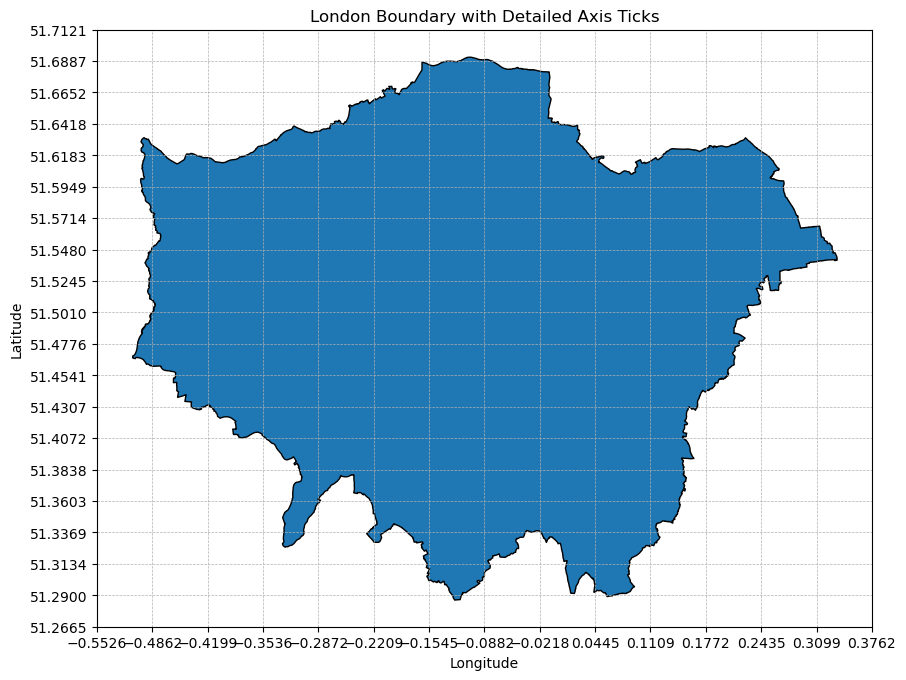

In [ ]:
# London boundary plot

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Load shapefile
gdf = gpd.read_file("gla")

# Reproject to WGS84
gdf = gdf.to_crs(epsg=4326)

# Set up plot
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='black')

# Get axis limits
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Add more ticks on x and y axes
ax.set_xticks(np.linspace(xlim[0], xlim[1], 15))  # Increase/decrease last number for more/less ticks
ax.set_yticks(np.linspace(ylim[0], ylim[1], 20))

# Add gridlines if helpful
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("London Boundary with Detailed Axis Ticks")
plt.show()


In [ ]:
# Outliers gone check

outofboundary_df = bigger_df[(bigger_df["Latitude"] > 51.69) | 
                          (bigger_df["Latitude"] < 51.28) |
                          (bigger_df["Longitude"] > 0.33) |
                          (bigger_df["Longitude"] < -0.51)]

print(len(outofboundary_df))

0
